In [13]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.8.0
0.23.0


In [14]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
torch version: 2.8.0
torchvision version: 0.23.0


In [15]:
import os
os.getcwd()

'/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks'

In [16]:
%pwd

'/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks'

In [17]:
%cd pytorch-deep-learning-main/my_notebooks/

[Errno 2] No such file or directory: 'pytorch-deep-learning-main/my_notebooks/'
/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks


/opt/anaconda3/envs/d2l/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [18]:
%pwd

'/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks'

In [19]:
from going_modular import data_setup, engine

In [20]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
from pathlib import Path
Path.cwd()

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks')

In [23]:
data_root = Path.cwd() / "data"
data_root

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data')

In [24]:
import os
import zipfile

from pathlib import Path
import requests

data_path = Path.cwd() / "data"
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesnt exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} dir exists. skip downloading")
else:
    print("fdidnt find the {image_path}, dopwnloading")
    image_path.mkdir(parents=True, exist_ok=True)

    # download from the url
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
        print("downloading ...")
        f.write(request.content)
    
    with zipfile.ZipFile( data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("unzipping data")
        zip_ref.extractall(image_path)
    
#os.remove( data_path / "pizza_steak_sushi.zip")



/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data/pizza_steak_sushi dir exists. skip downloading


In [25]:
# setup dir path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data/pizza_steak_sushi/train'),
 PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data/pizza_steak_sushi/test'))

# 2. Create Datasets and dataloaders

- using `data_setup.py` and `create_dataloaders`

In [26]:
from going_modular import data_setup


### 2.1 Creating a transform for `torchvision.models` (mannually)
`torchvision.models` contains pretraind model weights

In [27]:
from torchvision import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

manual_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])
manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [28]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=32,
)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x13f99ac70>,
 ['pizza', 'steak', 'sushi'])

### 2.2 Create a transform for th `torchvision.models` (automatically)

In [29]:
# get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [30]:
# Get the transforms used to create our preatrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
## Create data loaders using automatic transforms
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               batch_size=32,
                                                                               transform=auto_transforms,
                                                                               num_workers=0,)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x13fa52f70>,
 ['pizza', 'steak', 'sushi'])

## 3. Getting a pretrained model

various sources:
1. PyTorch domain libraries
2. Libraries like `timm`
3. HuggingFace Hub
4. Paperswithcode (integrated with Huggingface now)


### 3.1 How to choose one pretrained model?

- experiment!
- but the idea igenerally is: take an already well performing model from a problem space similar to your own and then customize to your own problem

Three things to consider:
1. Speed = how fast it need to run?
2. Size = how big is the model, you can afford to have?
3. performance = how well does it go in your chosen problem?

Where does the model live?

is it on the device? like a self driving car?
or does it live on a server? 



### 3.2 Setting up a pretrained model
- creating an instance of a pretrained `EffNetB0`

In [45]:
# older method (prior to torchvision v0.13)
#model = torchvision.models.efficientnet_b0(pretrained=True)

## newer method
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [35]:
model.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [37]:
model.avgpool, model.classifier

(AdaptiveAvgPool2d(output_size=1),
 Sequential(
   (0): Dropout(p=0.2, inplace=True)
   (1): Linear(in_features=1280, out_features=1000, bias=True)
 ))

### 3.3 Getting a summary of our model using `torchinfo.summary()`

In [38]:
# print summary with torchinfo
summary(model=model,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

### 3.4 Freezing the base model and changing the output layer to suit our needs

WIth a feature extractor model, typically you will "freeze" the base layers of a pretrained/foundational model and update only the final output layers to suit our specific problem


In [40]:
# freeze all of the base layers in EffNetB0
for param in model.features.parameters():
    #print(param)
    param.requires_grad = False

In [46]:
# update the classifier head to match our number of classes
from torch import nn

torch.manual_seed(42)


model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(class_names))
).to(device)

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [47]:
# print summary with torchinfo
summary(model=model,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

## 4. train model

In [48]:
# define loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [49]:
from going_modular import engine

torch.manual_seed(42)

#start thje timer
from timeit import default_timer as timer
start_time = timer()

##setup trining and save results

results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/envs/d2l/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch: 1 | train_loss: 0.4980 | train_acc: 0.7958 | test_loss: 0.1388 | test_acc: 0.9750
Epoch: 2 | train_loss: 0.2535 | train_acc: 0.9208 | test_loss: 0.1804 | test_acc: 0.9381
Epoch: 3 | train_loss: 0.1984 | train_acc: 0.9458 | test_loss: 0.0674 | test_acc: 0.9750
Epoch: 4 | train_loss: 0.0927 | train_acc: 0.9729 | test_loss: 0.2973 | test_acc: 0.9017
Epoch: 5 | train_loss: 0.1347 | train_acc: 0.9437 | test_loss: 0.2241 | test_acc: 0.9136
Total training time: 1129.128 seconds


## 5. Plot loss curves

imported plot_loss_curves


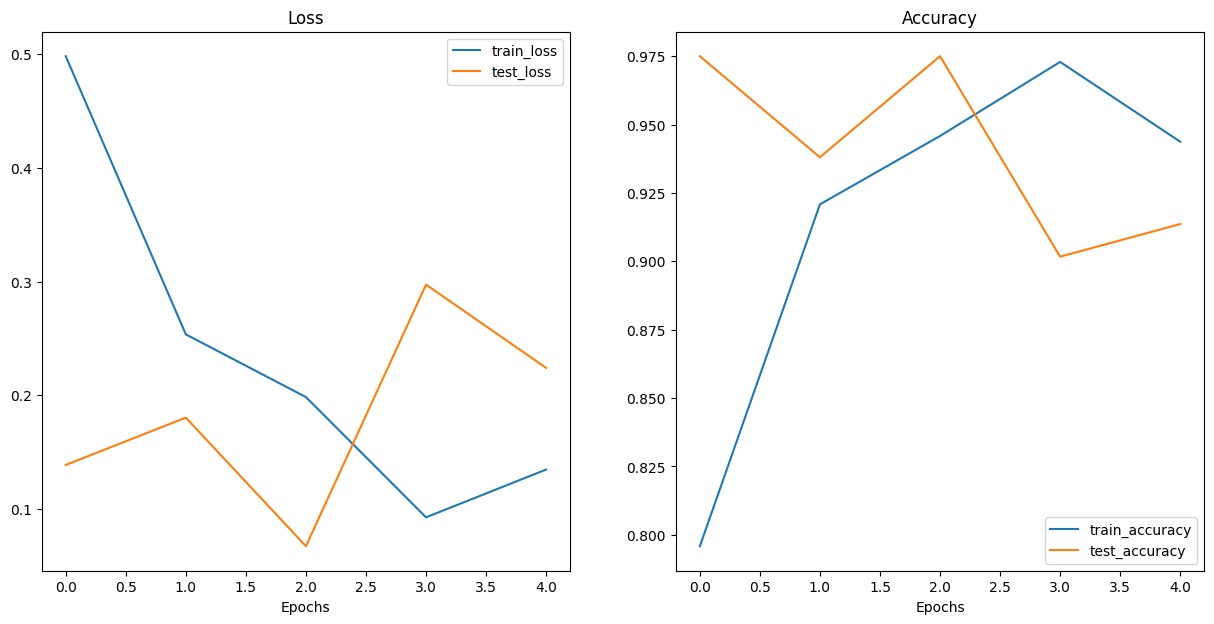

In [50]:
try:
    from helper_functions import plot_loss_curves
    print("imported plot_loss_curves")
except:
    print("[INFO] Couldn't find helper_functions... downloading from GitHub.")
    import requests
    with open("helper_function.py", "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
        from helper_functions import plot_loss_curves
        print("imported plot_loss_curves")  
plot_loss_curves(results)

## 6. Make predictions on images from the test set

create a func called `pred_and_plot_image()` to:
1. Take in a trained model, a list of class names, a filepath to a target image, an image size, a transform and a target device
2. Open the image with `PIL.Image.Open()`
3. Create a transform if one doesn't exist
4. Make sure the model is on the target device
5. Turn the model to `model.eval()` model to make sure it is ready for inference (this will turn off things like `nn.Droput()`)
6. Transform the target image and make sure its dimensionality is suited for the model 
7. make a prediction on the image by passing to the model
8. Convert the model's output logits to prediction probabilities using `torch.softmax()`
9. Convert the model's prediction probabilities to prediction labels using `torch.argmax()`
10. Plot the image with `matplotlib` and set the title to the prediction label froms step 9 and prediction probabilities

In [74]:
from typing import List, Tuple

from PIL import Image
from torchvision import transforms


def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None, # type: ignore
                        device: torch.device = "cpu"): # type: ignore
    """Predicts on an image with a trained model and plots the image with the predicted class label"""
    # open the img with PIL
    img = Image.open(image_path)

    # create a transform if it doesnt exist
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])  
    ### predict on the image with the model ####

    # make sure the model is on the target device
    model.to(device)

    # turn on eval and inference mode
    model.eval()
    with torch.inference_mode():
        #transform the image and add a batch dimension
        transformed_image = image_transform(img).unsqueeze(0).to(device) # type: ignore
        # make a prediction on the trransformed image, ensuring both on target device
        target_image_pred = model(transformed_image.to(device))

        # conver the model' output logits to prediction probabilities
        target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

        # get the pred class index
        target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
        
    # plot the image and predicted class label
    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted class: {class_names[target_image_pred_label]} | Probability: {target_image_pred_probs.max():.3f}")
    plt.axis(False);    

In [62]:
test_dir

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data/pizza_steak_sushi/test')

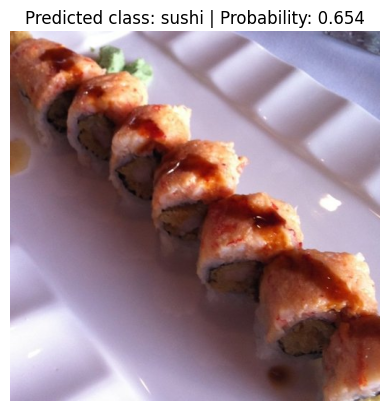

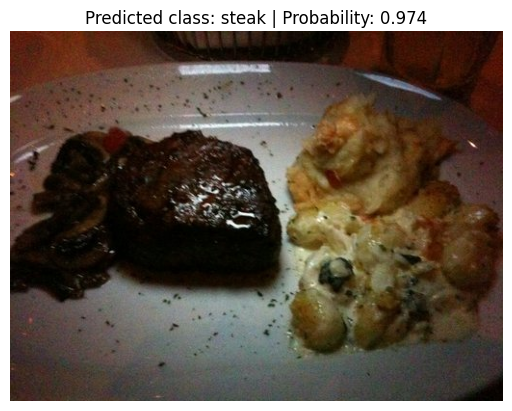

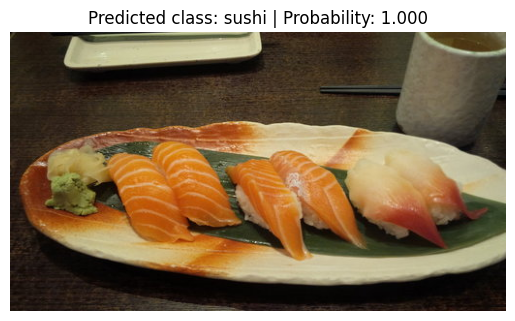

In [75]:
# get a random list  of image paths from the test directory
import random
num_images_to_plot = 3
test_image_paths_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_paths_sample = random.sample(test_image_paths_list,
                                        k=num_images_to_plot)


# make prediction on and plot the images
for image_path in test_image_paths_sample:
    #plt.figure()
    pred_and_plot_image(model=model,
                        image_path=str(image_path),
                        class_names=class_names,
                        image_size=(224, 224))
    #plt.show()

### 6.1 Making prediction on a custom inage

In [76]:
# Download the image
import requests

# setup the custom_image_path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# dowload the image if it doesn't exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading custom image to {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")


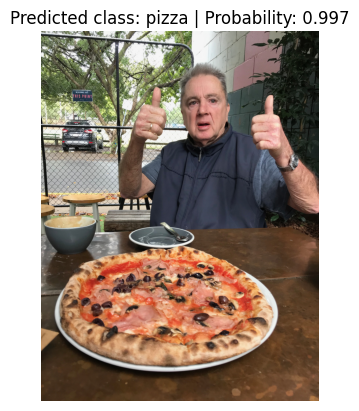

In [77]:
# predict on and plot the custom image
pred_and_plot_image(model=model,
                    image_path=str(custom_image_path),
                    class_names=class_names)